# Comparison of computation speeds between homogenous density tesseroid with variable density tesseroid

**Import Packages**

In [1]:
from __future__ import division
import timeit
import numpy as np
import pickle
from fatiando import gridder
from fatiando.mesher import Tesseroid
import matplotlib.pyplot as plt
# Our new tesseroid code
from tesseroid_density import tesseroid

## Linear Density

**Definition of tesseroid models: one with homogeneous density and other with variable density**

In [2]:
def density_linear(height):
    return -(3300-2670)/35000.*height + 2670

top, bottom = 0, -35000
homogeneous_mesh = Tesseroid(-10, 10, -10, 10, top, bottom)
variable_mesh = Tesseroid(-10, 10, -10, 10, top, bottom)

homogeneous_mesh.addprop('density', 100)
variable_mesh.addprop('density', density_linear)

**Computation Speeds Comparison**

In [3]:
fields = 'potential gz gzz'.split()
lon, lat = np.array([0.]), np.array([0.])
heights = np.array([2e3, 10e3, 50e3, 150e3, 260e3])
runs = 1000

times_homogeneous = {'heights': heights}
times_variable = {'heights': heights}

for field in fields:
    times_homogeneous[field] = []
    times_variable[field] = []
    for height in heights:
        h = np.array([height])
        t = timeit.timeit('getattr(tesseroid, field)(lon, lat, h, [homogeneous_mesh])',
                          'from __main__ import tesseroid, field, lon, lat, h, homogeneous_mesh',
                          number=runs)
        t /= float(runs)
        times_homogeneous[field].append(t)
        t = timeit.timeit('getattr(tesseroid, field)(lon, lat, h, [variable_mesh])',
                          'from __main__ import tesseroid, field, lon, lat, h, variable_mesh',
                          number=runs)
        t /= float(runs)
        times_variable[field].append(t)
    times_homogeneous[field] = np.array(times_homogeneous[field])
    times_variable[field] = np.array(times_variable[field])
    
## Save results in file
with open('results/speed-comparison/times_homogeneous.pkl', 'w') as outfile:
    pickle.dump(times_homogeneous, outfile)

with open('results/speed-comparison/times_linear.pkl', 'w') as outfile:
    pickle.dump(times_variable, outfile)

/home/santi/Documentos/geo/git-works/tesseroid-variable-density/code/tesseroid_density/tesseroid.py:247: RuntimeWarning: Stopped dividing a tesseroid because it's dimensions would be below the minimum numerical threshold (1e-6 degrees or 1e-3 m). Will compute without division. Cannot guarantee the accuracy of the solution.
  warnings.warn(warning_msg, RuntimeWarning)
/home/santi/Documentos/geo/git-works/tesseroid-variable-density/code/tesseroid_density/tesseroid.py:242: RuntimeWarning: Stopped dividing a tesseroid because it's dimensions would be below the minimum numerical threshold (1e-6 degrees or 1e-3 m). Will compute without division. Cannot guarantee the accuracy of the solution.
  warnings.warn(warning_msg, RuntimeWarning)


**Plot Results**

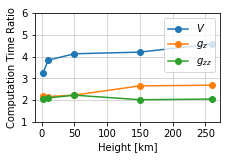

In [4]:
with open('results/speed-comparison/times_homogeneous.pkl', 'r') as outfile:
    times_homogeneous = pickle.load(outfile)

with open('results/speed-comparison/times_linear.pkl', 'r') as outfile:
    times_variable = pickle.load(outfile)

fields = 'potential gz gzz'.split()
fig, ax = plt.subplots()
fig.set_size_inches((3.33, 2))
labels = r'$V$ $g_z$ $g_{zz}$'.split()

for field, label in zip(fields, labels):
    heights = times_homogeneous['heights']
    ratio = times_variable[field]/times_homogeneous[field]
    ax.plot(heights/1000, ratio, 'o-', label=label)
    ax.grid(True, linewidth=0.5, color='#aeaeae')

ax.set_ylabel("Computation Time Ratio")
ax.set_xlabel('Height [km]')
ax.set_ylim(1, 6)
plt.legend()
plt.show()

## Exponential Density

In [5]:
top, bottom = 0, -35000
rho0, rho1 = 2670, 3300
b = 1e3
a = (rho1 - rho0)/(np.exp((abs(top - bottom))/b) - 1)
c = rho0 - a

def density_exponential(height):
    r = height
    return a*np.exp(-height/b) + c

homogeneous_mesh = Tesseroid(-10, 10, -10, 10, top, bottom)
variable_mesh = Tesseroid(-10, 10, -10, 10, top, bottom)

homogeneous_mesh.addprop('density', 100)
variable_mesh.addprop('density', density_exponential)

In [6]:
fields = 'potential gz gzz'.split()
lon, lat = np.array([0.]), np.array([0.])
heights = np.array([2e3, 10e3, 50e3, 150e3, 260e3])
runs = 1000

times_homogeneous = {'heights': heights}
times_variable = {'heights': heights}

for field in fields:
    times_homogeneous[field] = []
    times_variable[field] = []
    for height in heights:
        h = np.array([height])
        t = timeit.timeit('getattr(tesseroid, field)(lon, lat, h, [homogeneous_mesh])',
                          'from __main__ import tesseroid, field, lon, lat, h, homogeneous_mesh',
                          number=runs)
        t /= float(runs)
        times_homogeneous[field].append(t)
        t = timeit.timeit('getattr(tesseroid, field)(lon, lat, h, [variable_mesh])',
                          'from __main__ import tesseroid, field, lon, lat, h, variable_mesh',
                          number=runs)
        t /= float(runs)
        times_variable[field].append(t)
    times_homogeneous[field] = np.array(times_homogeneous[field])
    times_variable[field] = np.array(times_variable[field])
    
## Save results in file
with open('results/speed-comparison/times_homogeneous.pkl', 'w') as outfile:
    pickle.dump(times_homogeneous, outfile)

with open('results/speed-comparison/times_exponential.pkl', 'w') as outfile:
    pickle.dump(times_variable, outfile)

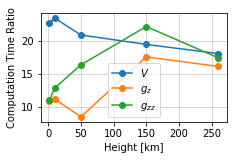

In [7]:
with open('results/speed-comparison/times_homogeneous.pkl', 'r') as outfile:
    times_homogeneous = pickle.load(outfile)

with open('results/speed-comparison/times_exponential.pkl', 'r') as outfile:
    times_variable = pickle.load(outfile)

fields = 'potential gz gzz'.split()
fig, ax = plt.subplots()
fig.set_size_inches((3.33, 2))
labels = r'$V$ $g_z$ $g_{zz}$'.split()

for field, label in zip(fields, labels):
    heights = times_homogeneous['heights']
    ratio = times_variable[field]/times_homogeneous[field]
    ax.plot(heights/1000, ratio, 'o-', label=label)
    ax.grid(True, linewidth=0.5, color='#aeaeae')

ax.set_ylabel("Computation Time Ratio")
ax.set_xlabel('Height [km]')
plt.legend()
plt.show()